In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
from datetime import datetime, timedelta

# Machine Learning 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.metrics import mean_squared_error ,mean_absolute_error , r2_score ,mean_absolute_percentage_error

# Time Series Models
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import warnings
import itertools
warnings.filterwarnings ('ignore')


#data loading
df = pd.read_csv(r"C:\Users\Sony\Desktop\crypto-markets23.csv")
df['date'] =  pd.to_datetime (df['date'],dayfirst= True)
df.shape
df.info()
df.describe()


<class 'pandas.DataFrame'>
RangeIndex: 942297 entries, 0 to 942296
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   slug         942297 non-null  str           
 1   symbol       942297 non-null  str           
 2   name         942297 non-null  str           
 3   date         942297 non-null  datetime64[us]
 4   ranknow      942297 non-null  int64         
 5   open         942297 non-null  float64       
 6   high         942297 non-null  float64       
 7   low          942297 non-null  float64       
 8   close        942297 non-null  float64       
 9   volume       942297 non-null  float64       
 10  market       942297 non-null  float64       
 11  close_ratio  942297 non-null  float64       
 12  spread       942297 non-null  float64       
dtypes: datetime64[us](1), float64(8), int64(1), str(3)
memory usage: 93.5 MB


,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,942297,942297.000000,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,942297.000000,9.422970e+05
mean,2017-08-10 04:42:55.641437,1000.170608,7.717319e+04,7.753781e+04,7.666803e+04,7.700624e+04,8.720390e+06,1.724980e+08,0.459499,1.123400e+02
min,2013-04-28 00:00:00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.000000,0.000000e+00
25%,2016-12-17 00:00:00,465.000000,5.080000e+02,5.240000e+02,4.950000e+02,5.080000e+02,1.750000e+02,2.958100e+04,0.162900,0.000000e+00
50%,2018-01-18 00:00:00,1072.000000,6.934000e+03,7.244000e+03,6.629000e+03,6.919000e+03,4.278000e+03,5.227960e+05,0.432400,0.000000e+00
75%,2018-07-24 00:00:00,1484.000000,5.559200e+04,5.768900e+04,5.326500e+04,5.527500e+04,1.190900e+05,6.874647e+06,0.745800,3.000000e-02
max,2018-11-30 00:00:00,2072.000000,9.482082e+06,9.482082e+06,5.861607e+06,5.956547e+06,2.384090e+10,3.270000e+11,1.000000,1.770563e+06
std,NaN,587.575283,1.704886e+05,1.685915e+05,1.720602e+05,1.701536e+05,1.839803e+08,3.575240e+09,0.326160,6.783713e+03


In [2]:
#exploratory Data Analysis

#Top cryptocurrencies analysis
top_10 = df.groupby('name').agg({'market' :  'max' , 'volume' :'mean' , 'close' : 'mean'}).sort_values ('market', ascending = False).head(10)
print(top_10)

#focus on bitcoin for detailed analysis
btc = df[df['symbol'] == 'BTC'].copy()
btc = btc.sort_values ('date') . reset_index(drop= True)

#calculate kpi
current_price = btc['close'].iloc[-1]
avg_price = btc['close'].mean()
max_price = btc['close'].max()
min_price = btc['close'].min()
price_volatility =btc['close'].std()
avg_volume = btc['volume'].mean()
total_market_cap = btc['market'].iloc[-1]
print (current_price)
print (avg_price)
print (max_price)
print(min_price)
print(price_volatility)
print(avg_volume)
print (total_market_cap)


                      market        volume          close
name                                                     
Bitcoin         3.270000e+11  2.868936e+07  112136.010008
ERC20           1.025826e+09  5.488158e+04  126301.511936
MagicCoin       8.388206e+08  3.747008e+04  122709.959538
Auroracoin      6.570321e+08  4.429938e+04  168664.424295
DNotes          3.968054e+08  4.131456e+04   18320.977273
ATMChain        3.328811e+08  2.844406e+05    8035.258294
Starbase        3.156075e+08  9.100304e+03   38776.685619
UNIVERSAL CASH  3.053759e+08  8.911158e+04    7610.928571
PayPie          2.975932e+08  1.638800e+05  234735.596618
MCAP            2.792987e+08  4.067915e+05  134641.000000
427885.0
165336.319294809
996557.0
100.0
247791.4467170315
1450145056.1718903
74451016927.0


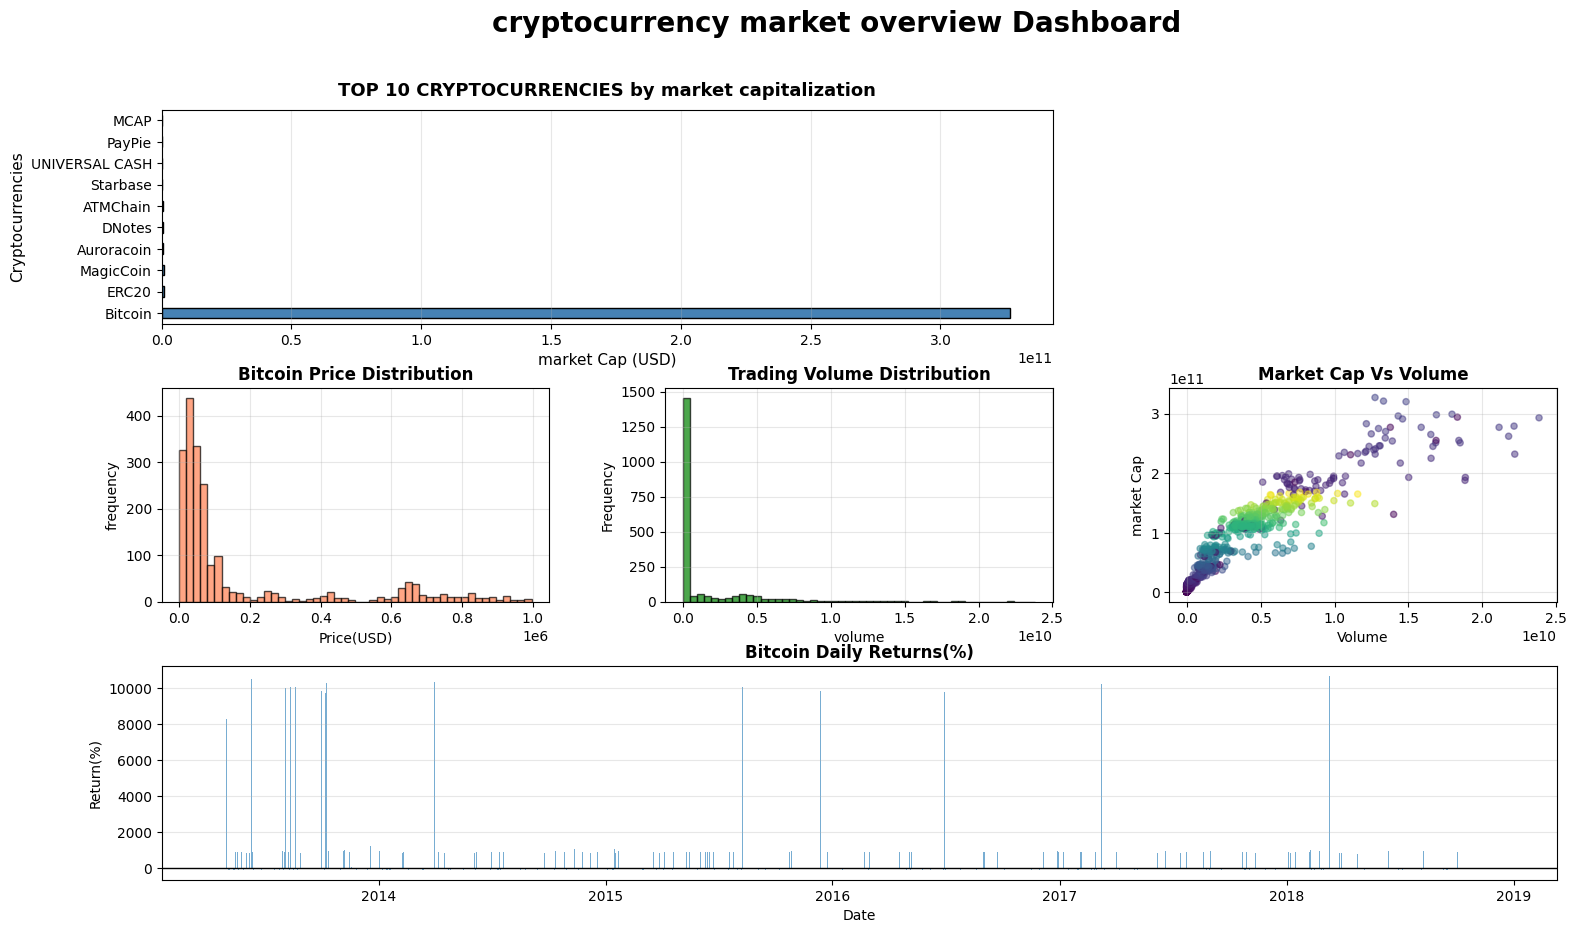

In [3]:
#advanced visualization

#market overview dashboard - chart1

fig = plt.figure (figsize= (18, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3 ,wspace= 0.3)
fig.suptitle ('cryptocurrency market overview Dashboard' , fontsize = 20 ,fontweight ='bold' , y= 0.98)

#top 10 market cap
ax1= fig.add_subplot(gs[0, :2])
top_10['market'].plot(kind='barh', ax= ax1, color= 'steelblue',edgecolor='black')
ax1.set_title ('TOP 10 CRYPTOCURRENCIES by market capitalization', fontsize=13, fontweight= 'bold', pad = 10  )
ax1.set_xlabel ('market Cap (USD)', fontsize=11)
ax1.set_ylabel('Cryptocurrencies', fontsize =11)
ax1.grid(axis = 'x',alpha=0.3)

#price distribution
ax3 = fig.add_subplot(gs[1,0])
btc['close'].hist(bins=50 , ax=ax3 , color= 'coral', edgecolor = 'black', alpha=0.7)
ax3.set_title('Bitcoin Price Distribution', fontsize = 12, fontweight= 'bold')
ax3.set_xlabel('Price(USD)', fontsize= 10)
ax3.set_ylabel('frequency', fontsize= 10)
ax3.grid(alpha=0.3)

#volume distribution
ax4= fig.add_subplot(gs[1,1])
btc['volume'].hist(bins= 50, ax=ax4, color= 'green', edgecolor='black', alpha=0.7)
ax4.set_title('Trading Volume Distribution', fontsize=12, fontweight= 'bold')
ax4.set_xlabel('volume', fontsize=10)
ax4.set_ylabel('Frequency', fontsize = 10)
ax4.grid(alpha=0.3)

#market vs volume Scatter
ax5= fig.add_subplot (gs[1,2])
ax5.scatter (btc['volume'], btc['market'], alpha=0.5, c=btc['close'], cmap='viridis', s=20)
ax5.set_title('Market Cap Vs Volume', fontsize=12, fontweight ='bold')
ax5.set_xlabel('Volume', fontsize=10)
ax5.set_ylabel('market Cap', fontsize=10)
ax5.grid(alpha=0.3)

#daily price change
btc['daily_return'] = btc['close'].pct_change()*100
ax6= fig.add_subplot(gs[2,:])
colors = ['green' if x > 0 else 'red' for x in btc['daily_return']]
ax6.bar(btc['date'],btc['daily_return'], width = 0.8, alpha =0.6 )
ax6.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax6.set_title('Bitcoin Daily Returns(%)', fontsize=12, fontweight='bold')
ax6.set_xlabel('Date', fontsize=10)
ax6.set_ylabel('Return(%)', fontsize=10)
ax6.grid(alpha=0.3, axis='y')

plt.savefig('chart01_market_overview.png',dpi=300, bbox_inches='tight')
plt.show()





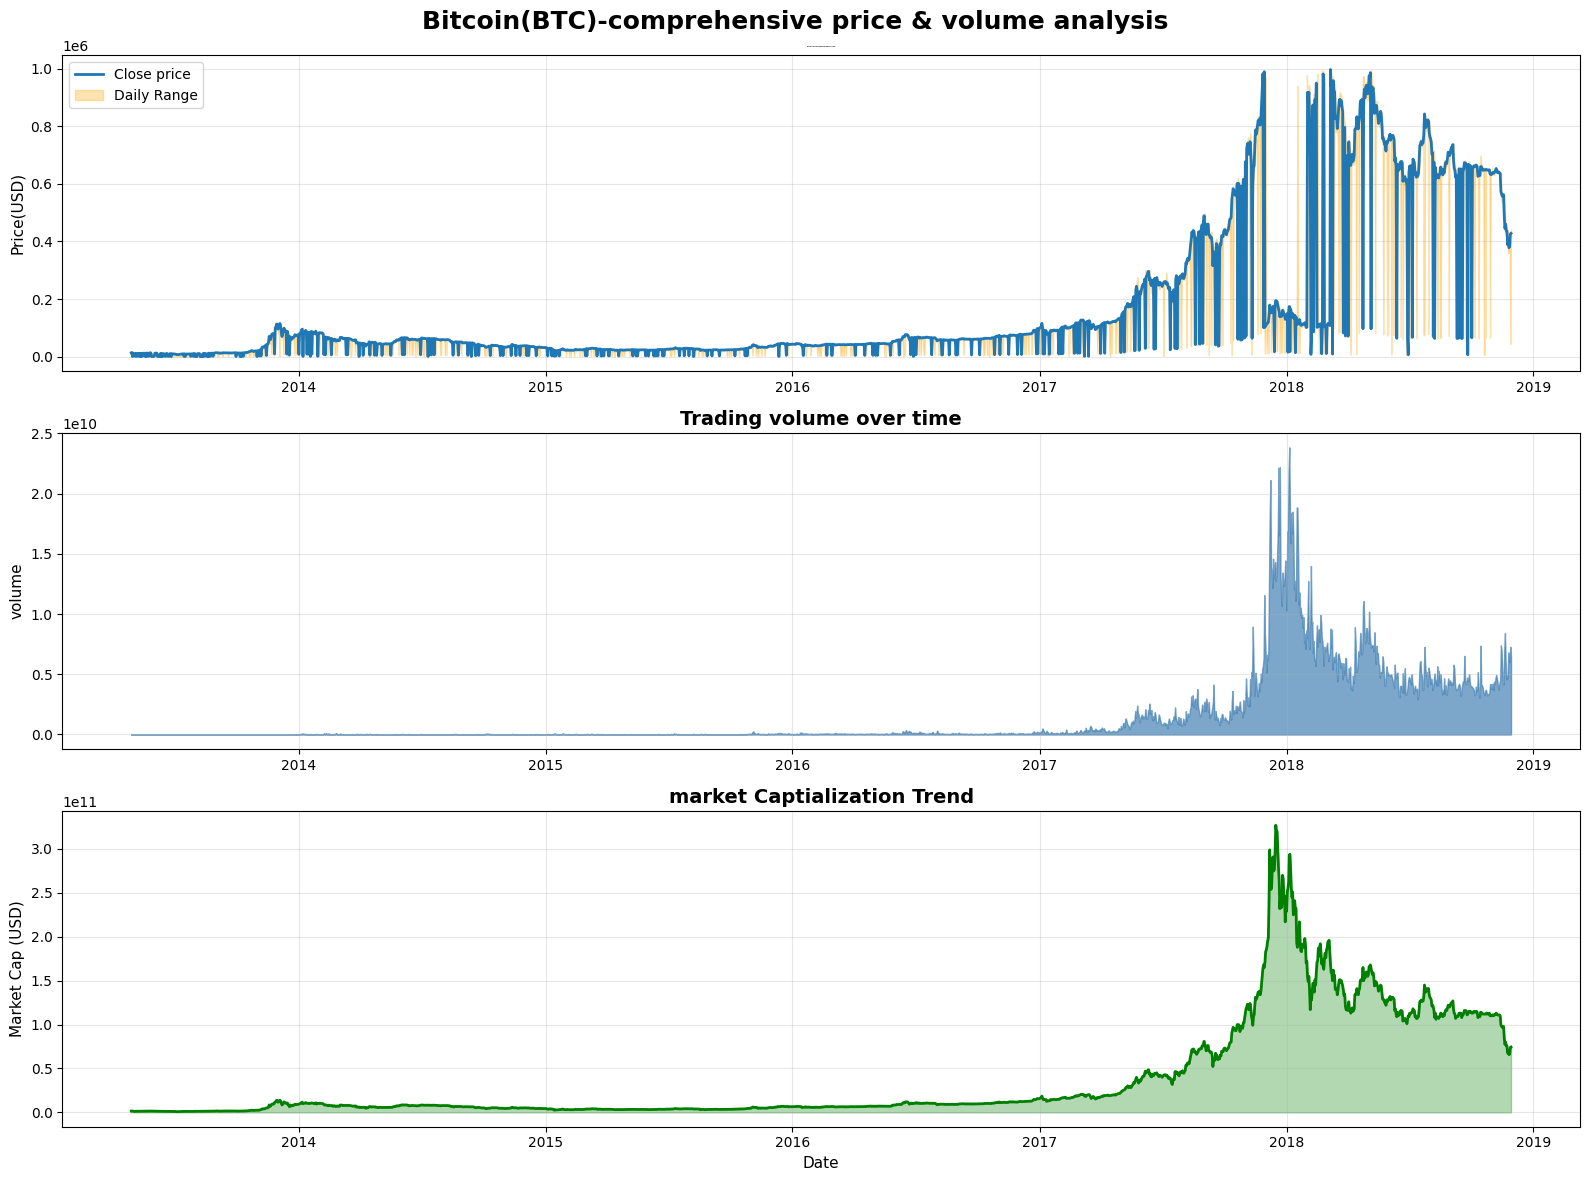

In [4]:
#Bitcoin Price Analysis

fig, axes = plt.subplots(3, 1, figsize= (16,12))
fig.suptitle('Bitcoin(BTC)-comprehensive price & volume analysis',fontsize=18, fontweight='bold')

# price Trend with high/low Range
axes[0].plot (btc['date'], btc['close'], linewidth=2, label= 'Close price')
axes[0].fill_between(btc['date'], btc['low'], btc['high'], alpha=0.3, color='orange', label= 'Daily Range')
axes[0].set_title('bitcoin Price Trend with Daily Range', fontsize=0.3, fontweight='bold')
axes[0].set_ylabel ('Price(USD)', fontsize=11)
axes[0].legend(loc='upper left', fontsize=10)
axes[0].grid(True, alpha=0.3)

# Trading Volume
axes[1].fill_between( btc['date'], btc['volume'], color='steelblue', alpha=0.7)
axes[1].set_title('Trading volume over time', fontsize=14, fontweight='bold')
axes[1].set_ylabel('volume',fontsize=11)
axes[1].grid(True, alpha=0.3)

#Market Capitalization
axes[2].plot(btc['date'], btc['market'], linewidth=2 , color= 'green')
axes[2].fill_between (btc['date'], btc['market'], alpha=0.3, color= 'green')
axes[2].set_title('market Captialization Trend',fontsize=14, fontweight='bold')
axes[2].set_xlabel('Date', fontsize=11)
axes[2].set_ylabel('Market Cap (USD)', fontsize=11)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig ('charto2_Bitcoin_Price_Analysis.png', dpi=300, bbox_inches='tight')
plt.show()

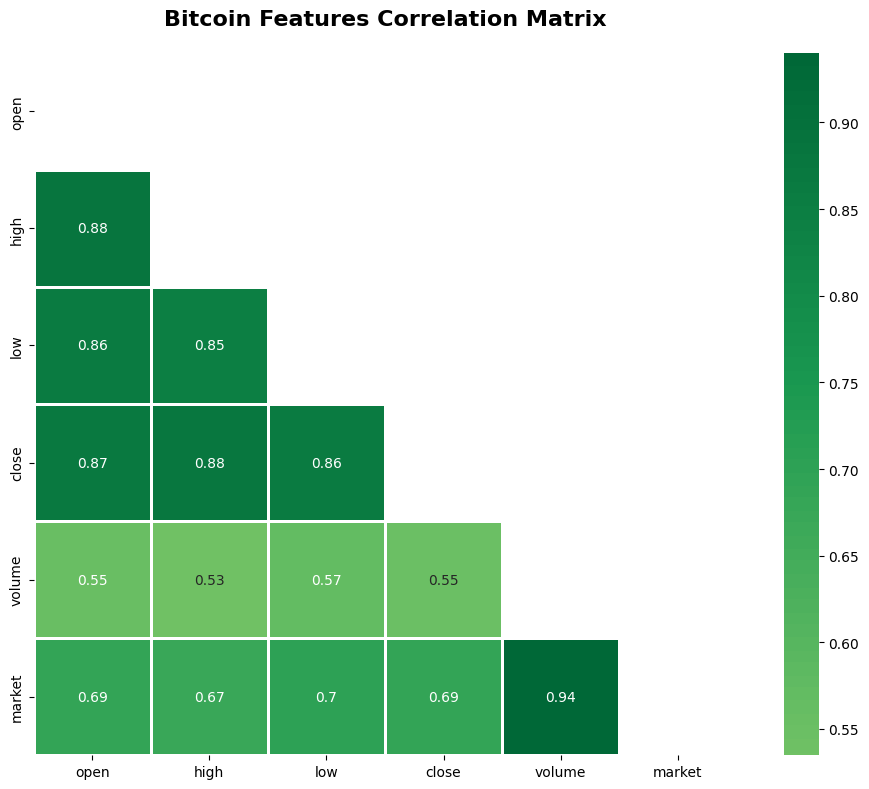

In [5]:
#correlation analysis
correlation_data= btc[['open', 'high', 'low','close','volume','market']].corr()
plt.figure (figsize=(10, 8))
mask= np.triu(np.ones_like(correlation_data, dtype=bool))
sns.heatmap(correlation_data, mask=mask, annot= True, cmap='RdYlGn', center=0, square=True, linewidths=2)
plt.title('Bitcoin Features Correlation Matrix', fontsize=16, fontweight= 'bold', pad=20)
plt.tight_layout()
plt.savefig('chart03_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()



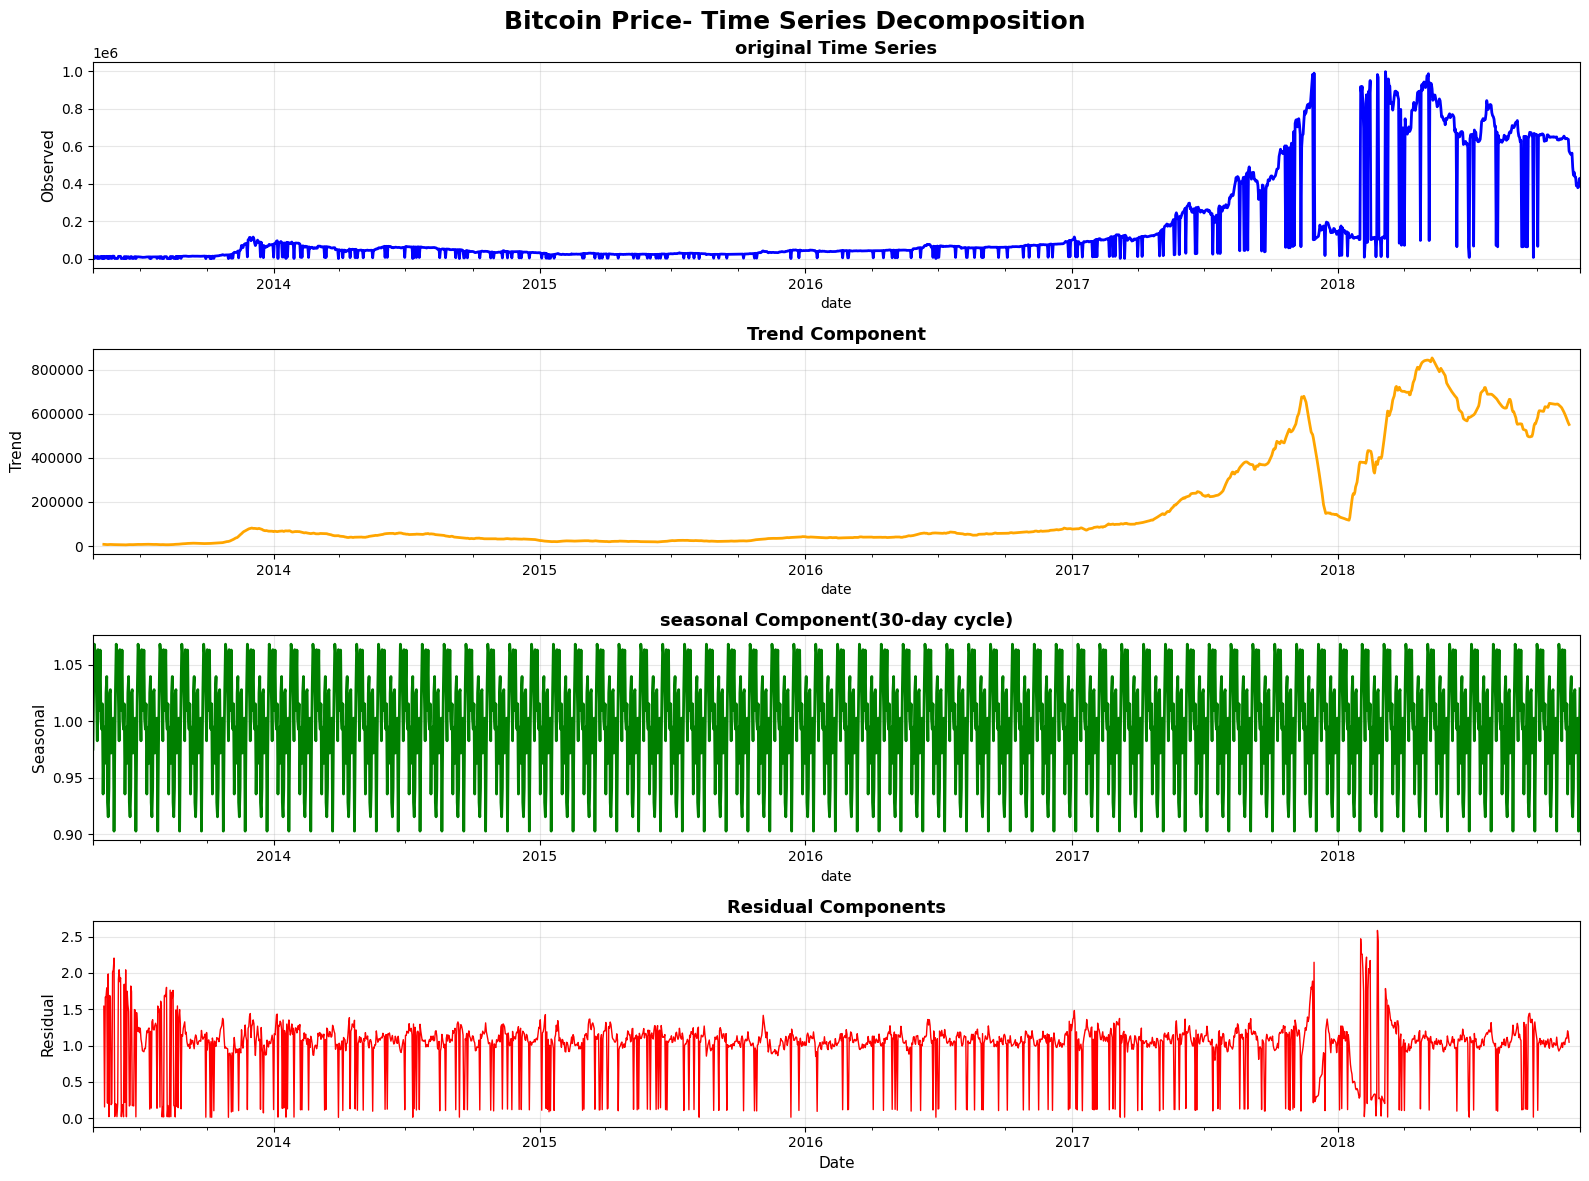

In [6]:
#time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# perform decomposition
ts_data =btc.set_index ('date')['close']
decomposition = seasonal_decompose(ts_data , model='multiplicative', period=30)

#chart4-tine series components
fig, axes= plt.subplots(4,1, figsize=(16,12))
fig.suptitle ('Bitcoin Price- Time Series Decomposition', fontsize=18, fontweight='bold')

decomposition.observed.plot(ax=axes[0], color='blue', linewidth=2)
axes[0].set_ylabel('Observed', fontsize=11)
axes[0].set_title ('original Time Series', fontsize=13, fontweight= 'bold')
axes[0].grid(True, alpha=0.3)

decomposition.trend.plot(ax=axes[1], color='orange',linewidth=2)
axes[1].set_ylabel ('Trend', fontsize=11)
axes[1].set_title('Trend Component', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

decomposition.seasonal.plot (ax=axes[2], color= 'green', linewidth=2)
axes[2].set_ylabel ('Seasonal', fontsize=11 )
axes[2].set_title ('seasonal Component(30-day cycle)', fontsize=13, fontweight='bold')
axes[2].grid (True, alpha=0.3)

decomposition.resid.plot (ax=axes[3],color= 'red', linewidth=1)
axes[3].set_ylabel('Residual', fontsize=11)
axes[3].set_title ('Residual Components', fontsize=13, fontweight='bold')
axes[3].set_xlabel ('Date', fontsize=11)
axes[3].grid (True, alpha=0.3)

plt.tight_layout()
plt.savefig('chart04_Time_series_Decomposition.png', dpi=300, bbox_inches='tight')
plt.show()


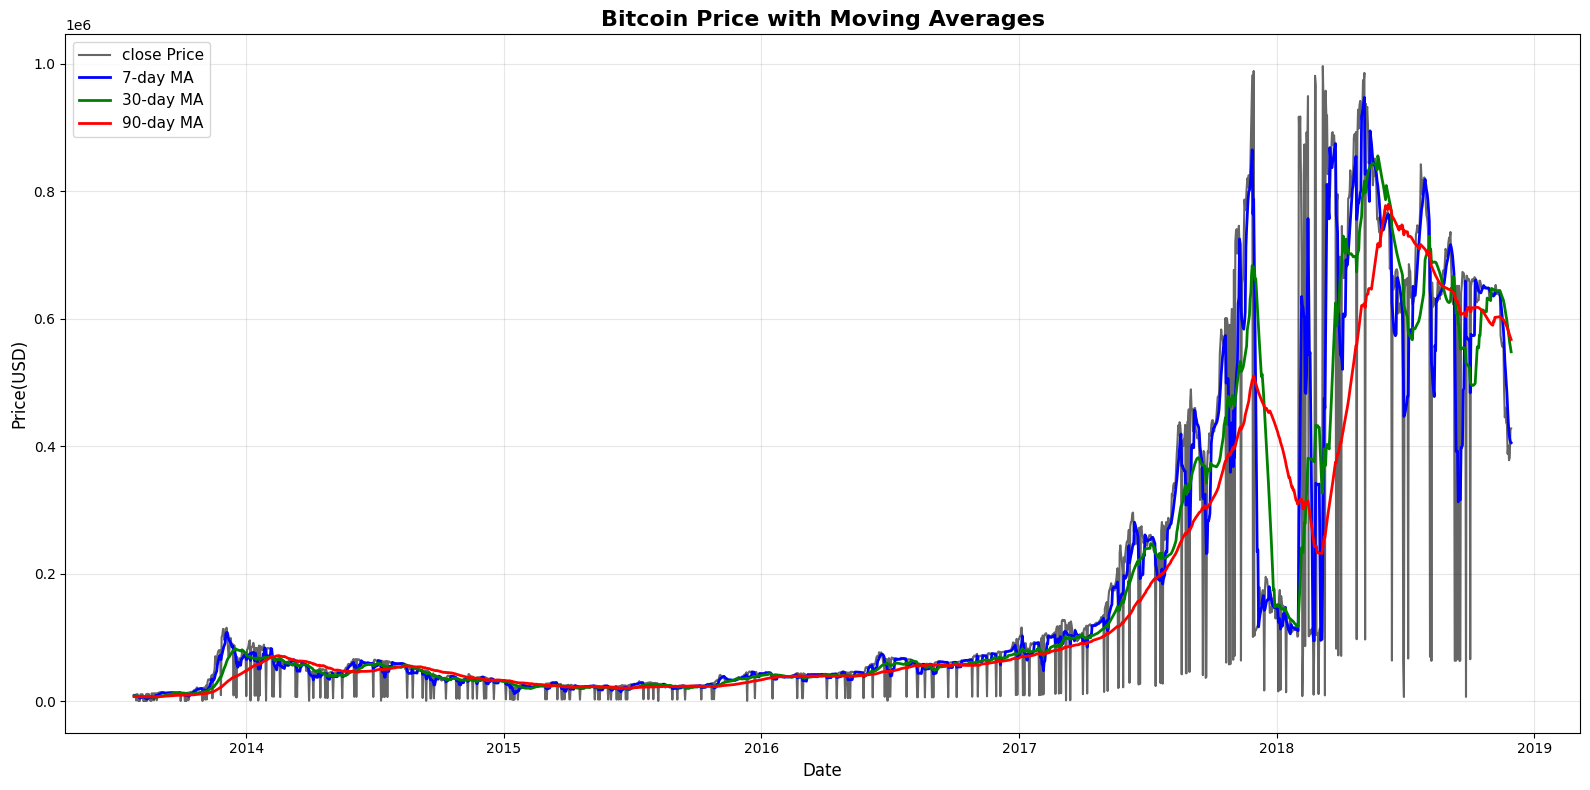

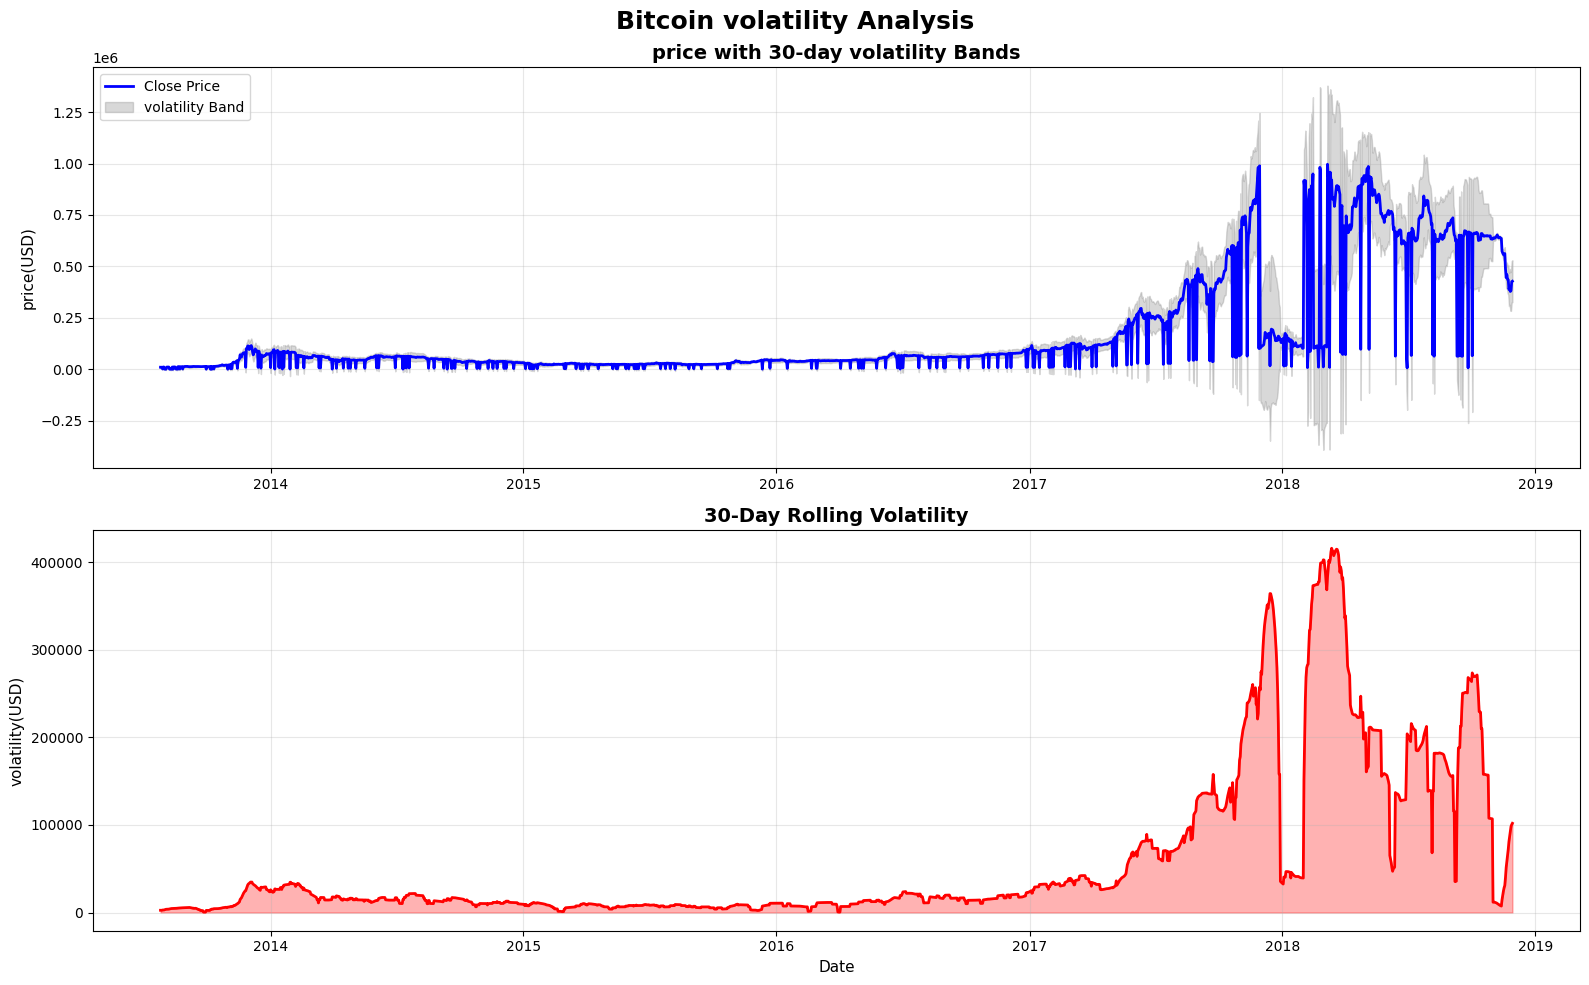

In [ ]:
#feature engineering

#technical Indicators
btc['MA_7'] = btc['close'].rolling(window=7).mean()
btc['MA_30'] = btc['close'].rolling(window=30).mean()
btc['MA_90'] = btc['close'].rolling(window=90).mean() 

btc['EMA_12'] = btc['close'].ewm(span=12, adjust=False).mean()
btc['EMA_26'] = btc['close'].ewm(span=26 ,adjust= False).mean()

btc['volatility'] = btc['close'].rolling(window=30).std()
btc['price_change'] = btc['close'].diff()
btc['price_range'] = btc['high'] - btc['low']

#lag features
btc['lag_1'] = btc['close'].shift(1)
btc['lag_7'] = btc['close'].shift(7)
btc['lag_30'] = btc['close'].shift(30)

#Date features
btc['day'] = btc['date'].dt.day
btc['month'] = btc['date'].dt.month
btc['year'] = btc['date'].dt.year
btc['day_of_week']= btc['date'].dt.dayofweek
btc['quarter']= btc['date'].dt.quarter

# Drop Nan
btc= btc.dropna().reset_index(drop=True)

#chart5-moving averages
plt.figure (figsize=(16,8))
plt.plot(btc['date'], btc['close'], linewidth=1.5, color='black', label= 'close Price', alpha=0.6)
plt.plot (btc['date'], btc['MA_7'], linewidth=2, color= 'blue', label='7-day MA')
plt.plot(btc['date'], btc['MA_30'], linewidth=2, color='green', label='30-day MA')
plt.plot(btc['date'], btc['MA_90'],linewidth=2, color='red', label= '90-day MA')
plt.title('Bitcoin Price with Moving Averages', fontsize=16, fontweight='bold')
plt.xlabel('Date',fontsize=12)
plt.ylabel('Price(USD)', fontsize=12)
plt.legend (loc='upper left', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('chart05_moving_Averages.png', dpi=300, bbox_inches='tight')
plt.show()

#charts 6:volatility analysis
fig, axes= plt.subplots(2, 1, figsize= (16,10))
fig.suptitle('Bitcoin volatility Analysis', fontsize=18, fontweight='bold')

#price with volatility bands
axes[0].plot(btc['date'], btc['close'], linewidth=2, color='blue', label='Close Price')
axes[0].fill_between (btc['date'],
                      btc['close']- btc['volatility'],
                      btc['close'] + btc['volatility'],
                      alpha=0.3, color='gray', label= 'volatility Band')
axes[0].set_title('price with 30-day volatility Bands', fontsize=14, fontweight='bold')
axes[0].set_ylabel('price(USD)', fontsize=11 )
axes[0].legend (loc= 'upper left')
axes[0].grid (True , alpha=0.3)

#volatility over time
axes[1].plot(btc['date'], btc['volatility'], linewidth=2 , color='red')
axes[1].fill_between (btc['date'], btc['volatility'], alpha=0.3, color='red')
axes[1].set_title ('30-Day Rolling Volatility', fontsize=14 , fontweight='bold')
axes[1].set_xlabel ('Date', fontsize=11)
axes[1].set_ylabel('volatility(USD)', fontsize=11)
axes[1].grid(True , alpha=0.3)
plt.tight_layout()
plt.savefig('chart06_volatility_Analysis.png', dpi=300, bbox_inches='tight')
plt.show()


 Training models

Training: Linear Regression
 .r2 score (train)' : 0.8827
  .r2 score(test) : 0.4517
 .RMSE : $216,972.35
 .MAE: $144,057.70
 .MAPE : 158.07%

Training: RandomForest
 .r2 score (train)' : 0.9756
  .r2 score(test) : 0.1011
 .RMSE : $277,828.01
 .MAE: $222,380.60
 .MAPE : 140.91%

Training: Gradient Boosting
 .r2 score (train)' : 0.9992
  .r2 score(test) : -0.4561
 .RMSE : $353,593.12
 .MAE: $292,423.44
 .MAPE : 142.18%


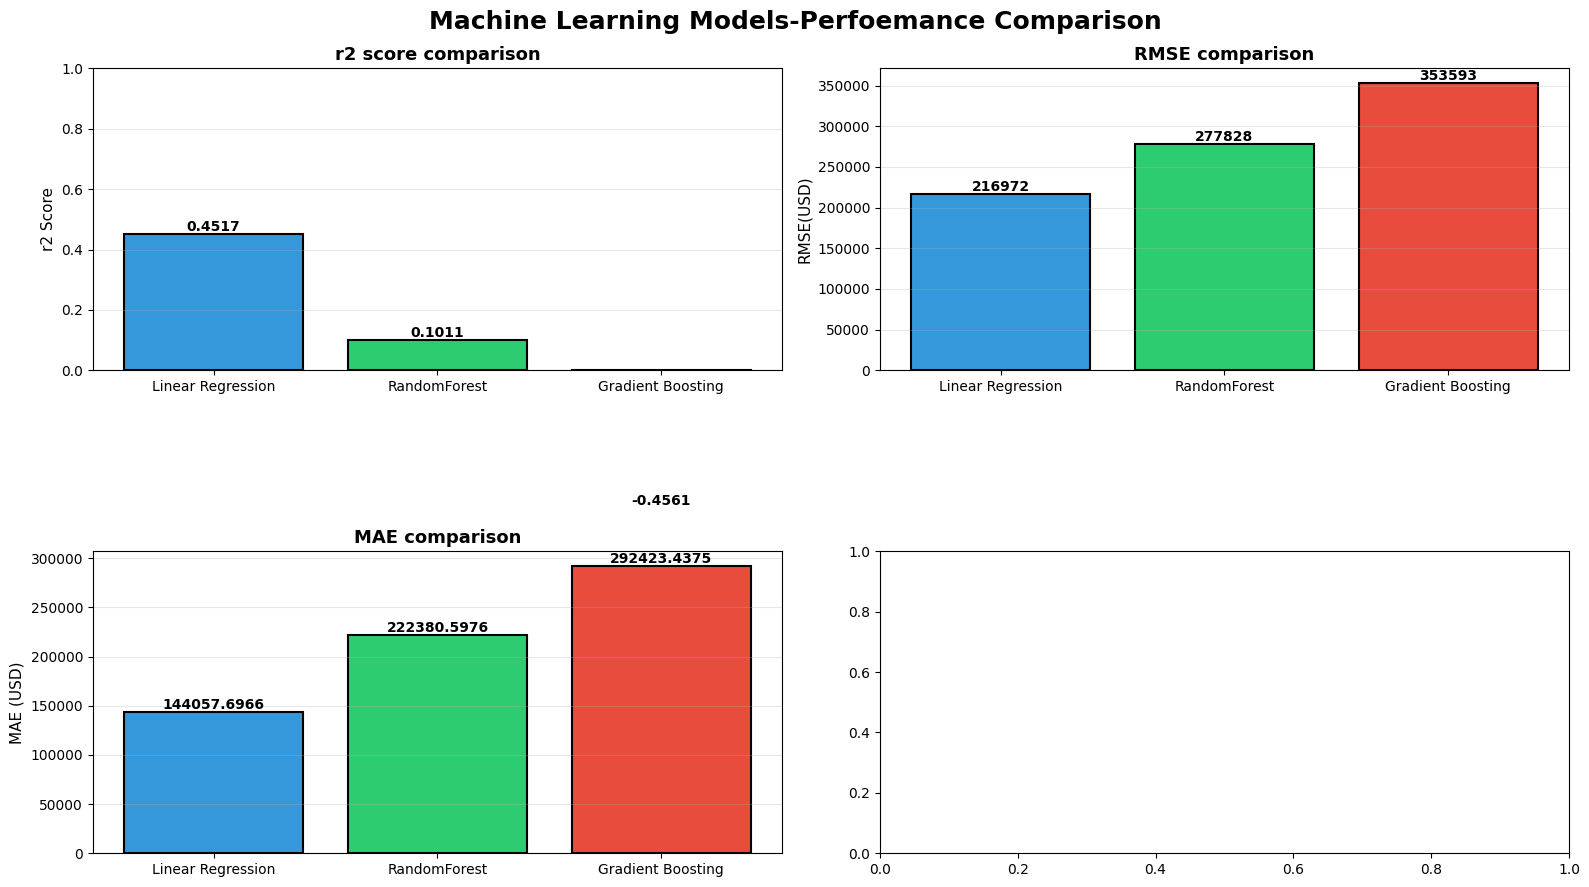


 BEST MODEL :Linear Regression
 .r2 score: 0.4517 (45.17%)
 .RMSE: $216,972.35
 .MAE: $144,057.70
 .MAPE: 158.07%


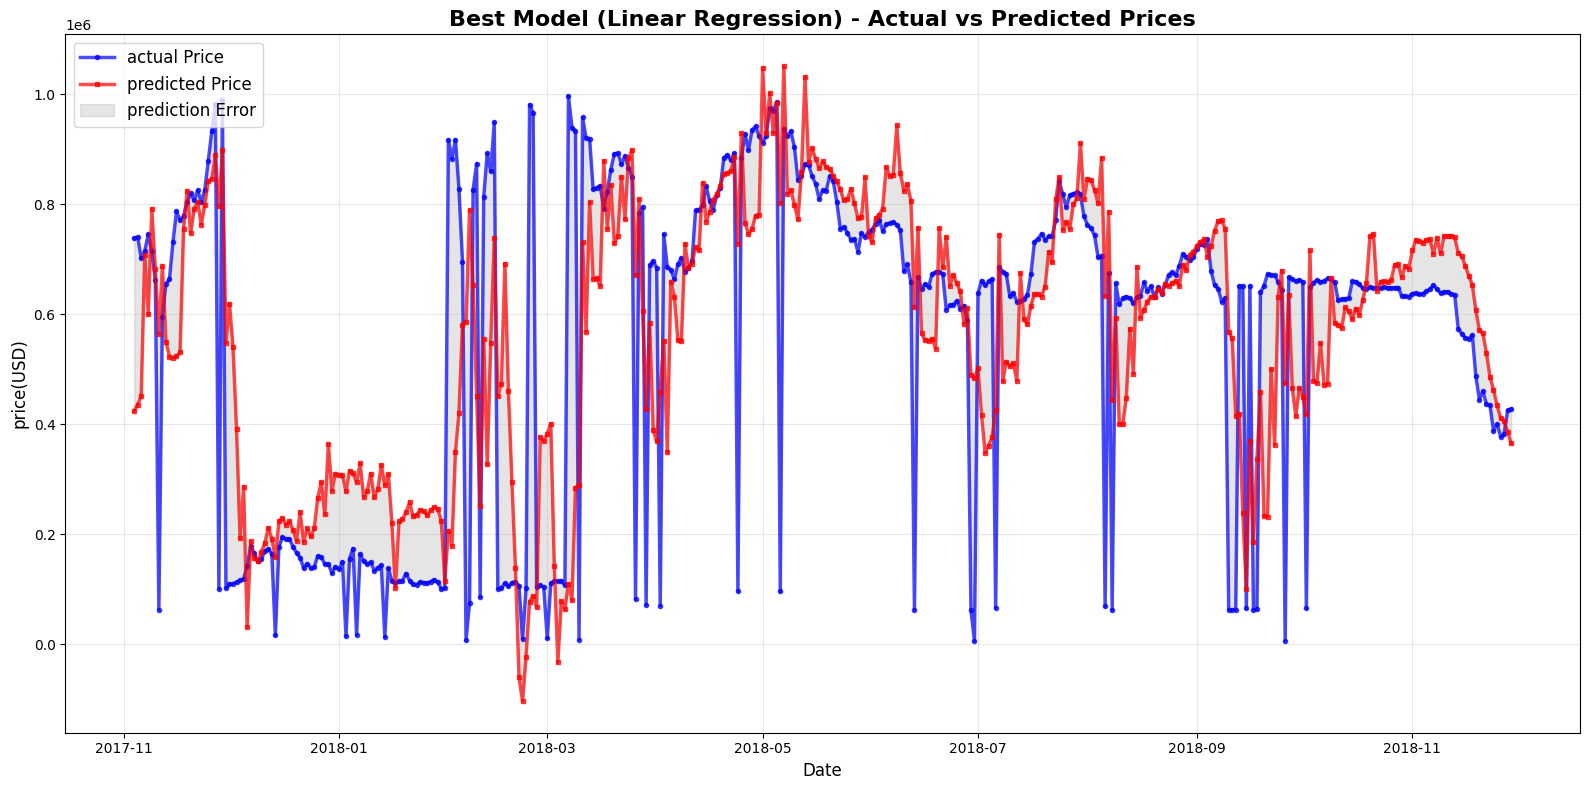

In [ ]:
#Machine learning models

# Prepare feature and target
feature_cols = ['open', 'high', 'low','volume', 'market', 'MA_7', 'MA_30', 'MA_90',
                'volatility', 'price_range', 'lag_1', 'lag_7', 'lag_30',
                 'day', 'month', 'year','day_of_week']

x= btc[ feature_cols]
y= btc['close']

# Train-test split (80-20)
split_idx = int(len(x)* 0.8)
x_train , x_test = x[:split_idx], x[split_idx:]
y_train , y_test = y[:split_idx], y[split_idx:] 
dates_test = btc['date'][split_idx:].reset_index(drop= True)

# Scale features
scaler = MinMaxScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled = scaler.transform (x_test)

# Define models
models = {
        'Linear Regression' : LinearRegression(),
        'RandomForest' : RandomForestRegressor(n_estimators=100 , max_depth=15, random_state=42, n_jobs=-1),
        'Gradient Boosting' : GradientBoostingRegressor(n_estimators=100, max_depth=7, random_state=42)
        }

results = {}
print ("\n Training models")
for name , model in models.items():
    print (f"\n{'='*50}")
    print(f"Training: {name}")
    print('='*50) 

    #Train
    model.fit (x_train_scaled, y_train)

    #predict
    y_pred_train = model.predict(x_train_scaled)
    y_pred_test = model.predict(x_test_scaled)

    #metrics
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score (y_test , y_pred_test)
    rmse = np.sqrt (mean_squared_error(y_test, y_pred_test))
    mae = mean_absolute_error (y_test, y_pred_test)
    mape = mean_absolute_percentage_error(y_test, y_pred_test)* 100

    results[name] = {
        'model' : model,
        'predictions' : y_pred_test ,
        'r2_train' : r2_train ,
        'r2_test ' : r2_test,
        'RMSE' : rmse,
        'MAE' : mae,
        'MAPE' : mape

  }
    
    print (f" .r2 score (train)' : {r2_train:.4f}")
    print(f"  .r2 score(test) : {r2_test:.4f}")
    print (f" .RMSE : ${rmse:,.2f}")
    print (f" .MAE: ${mae:,.2f}")
    print(f" .MAPE : {mape:.2f}%")

# chart7 Model Performance comparison  
fig, axes = plt.subplots(2,2,figsize =(16,9))   
plt.suptitle ('Machine Learning Models-Perfoemance Comparison', fontsize=18, fontweight ='bold')

model_names= list (results.keys())
colors_models = ['#3498db','#2ecc71', '#e74c3c']

#r2 scores
ax1 = axes[0,0]
r2_scores=[results[m]['r2_test '] for m in model_names]
bars= ax1.bar(model_names, r2_scores , color=colors_models, edgecolor= 'black', linewidth =1.5)
ax1.set_title('r2 score comparison', fontsize=13, fontweight='bold')
ax1.set_ylabel('r2 Score', fontsize=11)
ax1.set_ylim([0,1])
ax1.grid(axis = 'y', alpha=0.3)
for bar in bars:
    height = bar.get_height ()
    ax1.text (bar.get_x() + bar.get_width()/2. , height,
              f'{height :.4f}', ha= 'center', va='bottom' , fontsize= 10 ,fontweight = 'bold')
    
#RMSE  
ax2 = axes[0,1]
rmse_values=[results[m][ 'RMSE' ] for m in model_names]
bars= ax2.bar(model_names, rmse_values , color=colors_models, edgecolor= 'black', linewidth =1.5)
ax2.set_title('RMSE comparison', fontsize=13, fontweight='bold')
ax2.set_ylabel('RMSE(USD)', fontsize=11)
ax2.grid(axis = 'y', alpha=0.3)
for bar in bars:
    height = bar.get_height ()
    ax2.text (bar.get_x() + bar.get_width()/2. , height,
              f'{height :.0f}', ha= 'center', va='bottom' , fontsize= 10 ,fontweight = 'bold')
    
#MAE
ax3 = axes[1,0]
mae_values =[results[m]['MAE'] for m in model_names]
bars= ax3.bar(model_names, mae_values , color=colors_models, edgecolor= 'black', linewidth =1.5)
ax3.set_title('MAE comparison', fontsize=13, fontweight='bold')
ax3.set_ylabel('MAE (USD)', fontsize=11)
ax3.grid(axis = 'y', alpha=0.3)
for bar in bars:
    height = bar.get_height ()
    ax3.text (bar.get_x() + bar.get_width()/2. , height,
              f'{height :.4f}', ha= 'center', va='bottom' , fontsize= 10 ,fontweight = 'bold')  
    
plt.tight_layout()
plt.savefig('chart07_model_comparison.png',dpi=300, bbox_inches= 'tight')  
plt.show() 

#best model
best_model_name = max(results.keys(), key=lambda k: results[k]['r2_test '])
best_model = results [best_model_name]

print (f"\n BEST MODEL :{best_model_name}")
print (f" .r2 score: {best_model['r2_test ']:.4f} ({best_model['r2_test ']*100:.2f}%)")
print (f" .RMSE: ${best_model['RMSE']:,.2f}" )
print (f" .MAE: ${best_model['MAE']:,.2f}" )
print (f" .MAPE: {best_model['MAPE']:.2f}%")

#chart8: Best model - Actual vs predicted

plt.figure(figsize= (16,8))

plt.plot(dates_test, y_test.values, linewidth=2.5 ,color='blue', marker='o', markersize=3 ,label= 'actual Price', alpha=0.7)
plt.plot(dates_test, best_model['predictions'], linewidth = 2.5 ,color='red', marker='s', markersize=3, label = 'predicted Price', alpha=0.7)
plt.fill_between(dates_test, y_test.values, best_model['predictions'],alpha=0.2, color='gray', label = 'prediction Error')
plt.title(f'Best Model ({best_model_name}) - Actual vs Predicted Prices', fontsize=16, fontweight= 'bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('price(USD)', fontsize=12)
plt.legend (loc='upper left', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('chart08_best_model_predictions.png', dpi=300 , bbox_inches='tight')
plt.show()
    


 Training ARIMA Model(5, 1, 0) ...
 .R2 score : -0.1872
 .RMSE : $319,279.38
 .MAE : $301,128.45
 .MAPE : 210.26%


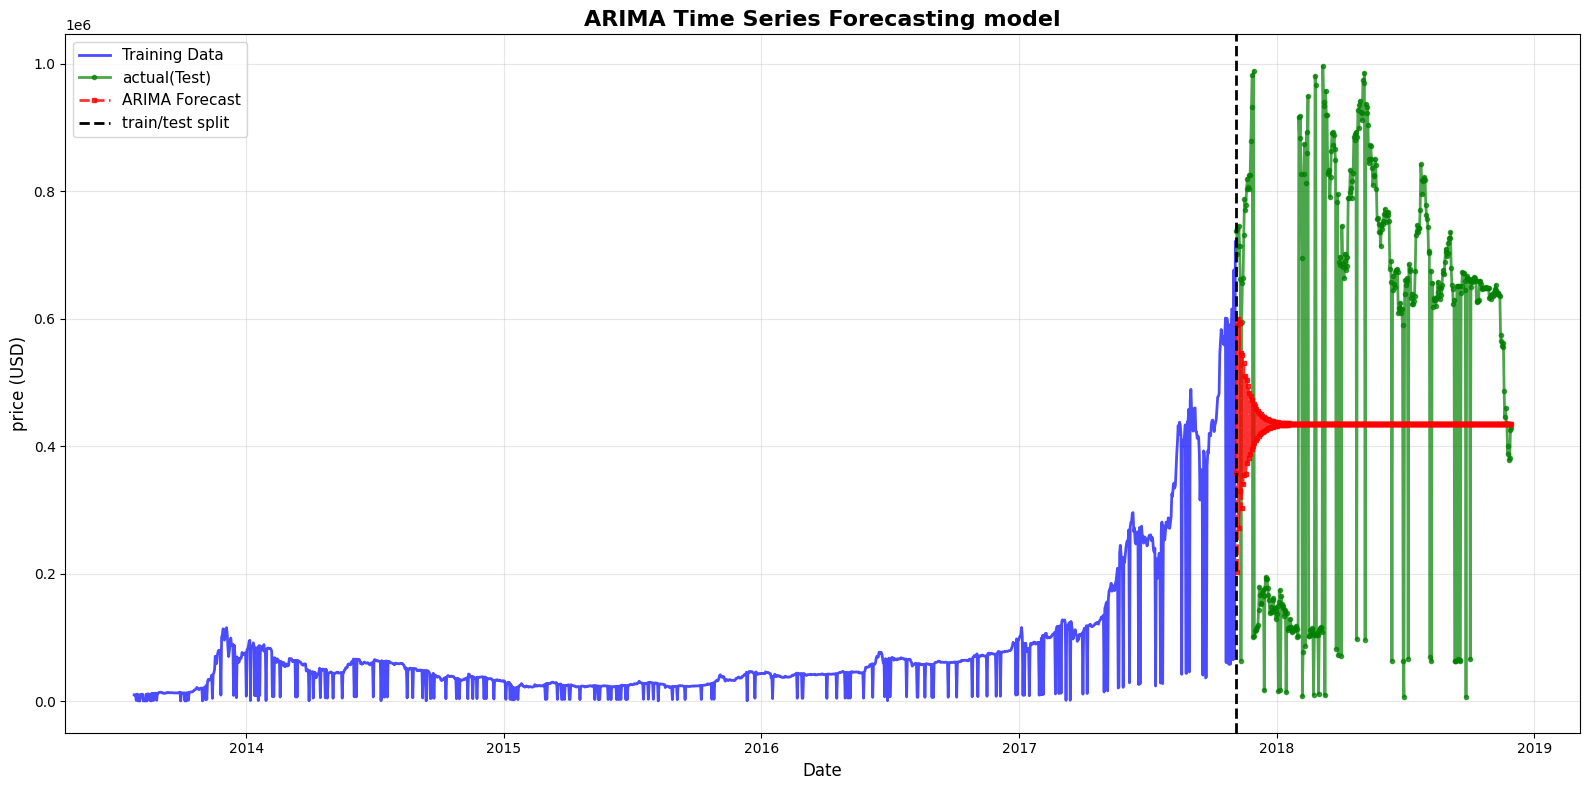

In [ ]:
#time series forcasting(ARIMA)

# Prepare time series
ts_close =btc.set_index('date')['close']
train_ts = ts_close[:split_idx]
test_ts = ts_close[split_idx:]

# fit ARIMA Model
print("\n Training ARIMA Model(5, 1, 0) ...")
arima_model = ARIMA (train_ts,  order=(5,1,0))
arima_fitted = arima_model.fit()

#Forecast
arima_forecast = arima_fitted.forecast(steps= len(test_ts))

#metrics
r2_arima = r2_score(test_ts, arima_forecast)
rmse_arima = np.sqrt(mean_squared_error(test_ts, arima_forecast))
mae_arima = mean_absolute_error(test_ts,arima_forecast)
mape_arima = mean_absolute_percentage_error(test_ts, arima_forecast)* 100

results['ARIMA'] = {
    'model' : arima_fitted ,
    'predictions ' : arima_forecast.values,
    'R2_test' : r2_arima,
    'RMSE' : rmse_arima,
    'MAE' : mae_arima,
    'MAPE' : mape_arima    
    }

print (f" .R2 score : {r2_arima:.4f}")
print (f" .RMSE : ${rmse_arima:,.2f}")
print (f" .MAE : ${mae_arima:,.2f}")
print (f" .MAPE : {mape_arima:.2f}%")

# chart9-ARIMA forecasting
plt.figure(figsize=(16,8))

#historical training data 
plt.plot (train_ts.index, train_ts.values, linewidth=2, color='blue', label='Training Data', alpha=0.7)

# actual test data
plt.plot (test_ts.index, test_ts.values, linewidth=2, color='green',marker='o', markersize=3, label='actual(Test)', alpha=0.7)

#ARIMA forecast
plt.plot (test_ts.index, arima_forecast, linewidth=2, color='red', marker='s', markersize=3, linestyle='--', label='ARIMA Forecast', alpha=0.8)
plt.axvline (x=test_ts.index[0], color='black', linestyle= '--', linewidth=2, label = 'train/test split')
plt.title('ARIMA Time Series Forecasting model', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel ('price (USD)', fontsize=12)
plt.legend (loc='upper left', fontsize=11)
plt.grid (True, alpha=0.3)
plt.tight_layout()
plt.savefig('chart09_ARIMA_Forecast.png', dpi=300, bbox_inches='tight')
plt.show()




 FORECAST SUMMARY: 
 .Current Price: $427,885.00
 .ARIMA 30-Day: $434,850.04
 .Linear 30-days : $75,367.77
 .Ensemble 30 Day : $255,108.90
 .Excepted Change : $-172,776.10, (-40.38%)
 Bearish

 WEEKLY BREAKDOWN:
 week 1: $377,273.81 (-0.12%)
 week 2: $340,093.18 (-0.21%)
 week 3: $302,912.56 (-0.29%)
 week 4: $265,731.94 (-0.38%)


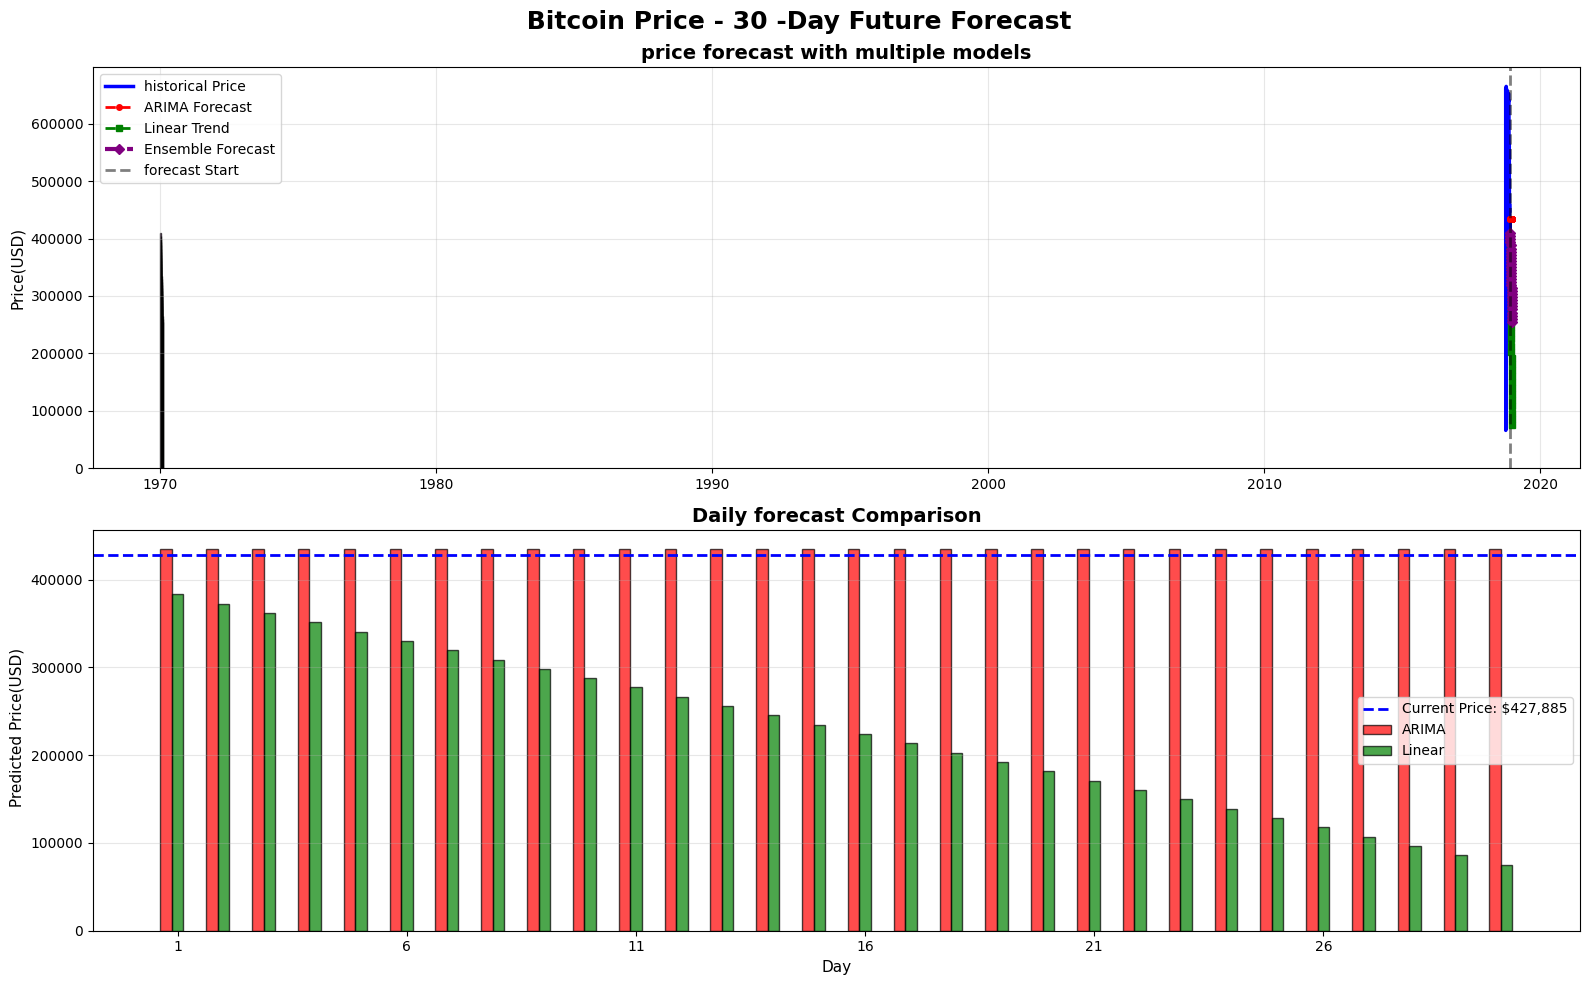

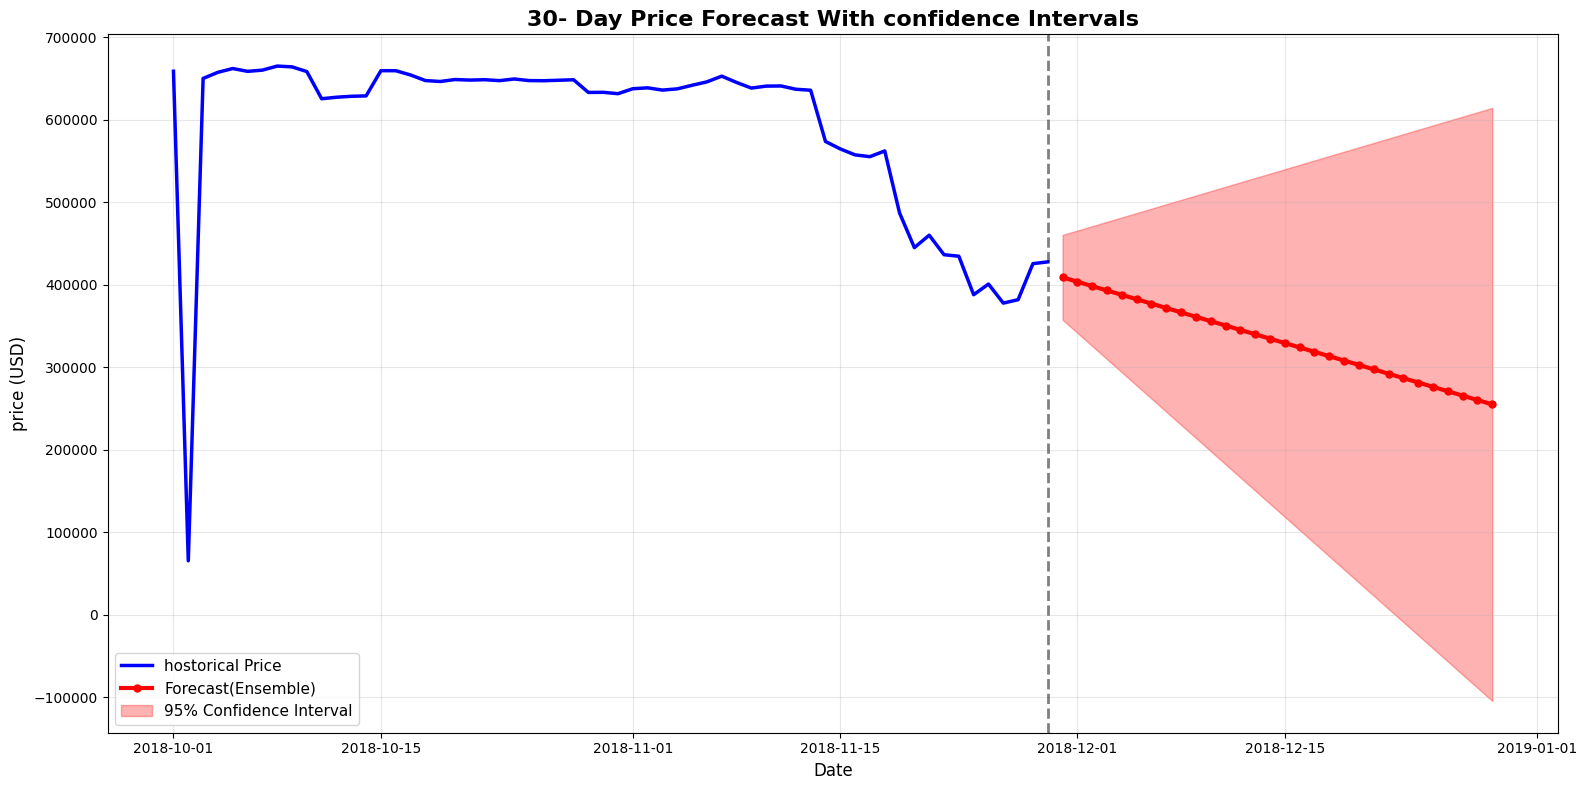

In [10]:
# future price forecasting(next 30 days)

#ARIMA 30-day forecast
future_days= 30

arima_future = arima_fitted.forecast(steps= len(test_ts) + future_days)
future_forecast = arima_future[-future_days :]
future_dates = pd.date_range (start = btc['date'].iloc[-1] +  timedelta(days=1), periods=future_days, freq= 'D')

# linear trend extraplotation
last_30_prices = btc['close'].tail(30).values
days_array = np.arange(len(last_30_prices)).reshape (-1, 1)
future_days_array = np.arange(len(last_30_prices),len(last_30_prices)+ future_days).reshape(-1, 1)
linear_model = LinearRegression()
linear_model.fit (days_array, last_30_prices)
linear_forecast = linear_model.predict(future_days_array)

#ensemble forecast (average)
ensemble_forecast = (future_forecast.values + linear_forecast) / 2 

#create forecast dataframe
forecast_df = pd.DataFrame ({
    'Date' : future_dates,
    'ARIMA_Forecast' : future_forecast.values ,
    'Linear_forecast' : linear_forecast.flatten(),
    'Ensemble_forecast' : ensemble_forecast.flatten()
})

current_price = btc['close'].iloc[-1]
forecast_30d = ensemble_forecast[-1]
price_change = forecast_30d - current_price
price_change_pct =  (price_change/current_price)* 100

print ("\n FORECAST SUMMARY: ")
print (f" .Current Price: ${current_price:,.2f}")
print (f" .ARIMA 30-Day: ${future_forecast.values[-1]:,.2f}")
print (f" .Linear 30-days : ${linear_forecast[-1]:,.2f}")
print (f" .Ensemble 30 Day : ${forecast_30d:,.2f}")
print (f" .Excepted Change : ${price_change:,.2f}, ({price_change_pct:+.2f}%)")
print (f" {'Bullish' if price_change > 0 else 'Bearish' }")

print (f"\n WEEKLY BREAKDOWN:")
for week in range (1,5):
    week_idx = min (week * 7 - 1, len(forecast_df)-1)
    week_price = forecast_df['Ensemble_forecast'].iloc[week_idx]
    week_change = ((week_price - current_price ) /current_price)
    print (f" week {week}: ${week_price:,.2f} ({week_change:+.2f}%)")

#chart10  30-days future forecast    
fig ,axes = plt.subplots (2,1, figsize=(16,10))
fig.suptitle (' Bitcoin Price - 30 -Day Future Forecast', fontsize= 18, fontweight ='bold' )

# historical + Forecast
ax1 = axes[0]
historical_last_60 = btc.tail(60)
ax1.plot (historical_last_60['date'], historical_last_60['close'], linewidth =2.5, color = 'blue', label = 'historical Price')
ax1.plot (future_dates , forecast_df['ARIMA_Forecast'], linewidth = 2,color = 'red', linestyle = '--', marker='o', 
          markersize=4, label="ARIMA Forecast")
ax1.plot (future_dates , forecast_df['Linear_forecast'], linewidth = 2,color = 'green', linestyle = '--', marker='s', 
          markersize=4, label="Linear Trend")
ax1.plot (future_dates , forecast_df['Ensemble_forecast'], linewidth = 3,color = 'purple', linestyle = '--', marker='D', 
          markersize=5, label="Ensemble Forecast")
ax1.axvline (x=btc['date'].iloc[-1], color ='black', linestyle='--', linewidth=2, alpha=0.5, label= 'forecast Start' )
ax1.set_title ('price forecast with multiple models', fontsize=14, fontweight='bold') 
ax1.set_ylabel ('Price(USD)', fontsize=11)
ax1.legend (loc= 'best', fontsize=10)
ax1.grid (True, alpha=0.3)

#forecast camparison
ax2 = axes[1]
x_pos = np.arange(len(forecast_df))
width = 0.25
ax2.bar(x_pos - width, forecast_df['ARIMA_Forecast'], width ,color = 'red', alpha=0.7, edgecolor='black', label="ARIMA")
ax2.bar (x_pos, forecast_df['Linear_forecast'], width ,color = 'green', alpha=0.7, edgecolor= 'black',  label="Linear")
ax1.bar (x_pos + width , forecast_df['Ensemble_forecast'], width , color = 'purple', alpha=0.7, edgecolor = 'black', label="Ensemble")
ax2.axhline (y =current_price, color ='blue', linestyle='--', linewidth=2, label= f'Current Price: ${current_price:,.0f}' )
ax2.set_title ('Daily forecast Comparison', fontsize=14, fontweight='bold') 
ax2.set_xlabel ('Day', fontsize=11)
ax2.set_ylabel (' Predicted Price(USD)', fontsize=11)
ax2.set_xticks (x_pos[::5])
ax2.set_xticklabels (range (1, 31, 5))
ax2.legend (loc= 'best', fontsize=10)
ax2.grid (True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig ('chart10_Future_Forecast_30Days.png', dpi=300, bbox_inches='tight')

#chart 11 forecast confidence intervals
plt.figure(figsize=(16, 8))

#calculate confidence level
forecast_std = np.std([forecast_df['ARIMA_Forecast'], forecast_df['Linear_forecast']], axis=0)
upper_bound = forecast_df['Ensemble_forecast'] + 2 * forecast_std
lower_bound = forecast_df['Ensemble_forecast'] - 2 * forecast_std

#plot
plt.plot (btc['date'].tail(60), btc['close'].tail(60), linewidth = 2.5, color = 'blue', label= 'hostorical Price')
plt.plot (future_dates, forecast_df['Ensemble_forecast'], linewidth= 3, color = 'red', marker='o', markersize=5, label = 'Forecast(Ensemble)')
plt.fill_between (future_dates, lower_bound, upper_bound, alpha=0.3, color = 'red', label = '95% Confidence Interval')
plt.axvline (x= btc['date'].iloc[-1], color = 'black', linestyle = '--', linewidth= 2, alpha=0.5)
plt.title('30- Day Price Forecast With confidence Intervals', fontsize=16, fontweight='bold')
plt.xlabel ('Date',fontsize=12)
plt.ylabel ('price (USD)', fontsize=12)
plt.legend (loc= 'best', fontsize=11)
plt.grid (True, alpha=0.3 )
plt.tight_layout()
plt.savefig('chart11_forecast_confidence.png', dpi=300, bbox_inches='tight')
plt.show()



       

In [11]:
# export 1 : Top_Cryptocurrencies
top_10.reset_index(). to_csv(r"C:\Users\Sony\Desktop\PowerBI_01_TopCryptocurrencies.csv",  index= False)
print (" Exported: PowerBI_O1_TopCryptocurrencies.csv")

# export 2 : Bitcoin complete datasets
btc_export = btc [['date', 'open', 'high', 'low', 'close', 'volume', 'market', 
                   'MA_7', 'MA_30', 'MA_90', 'EMA_12', 'EMA_26', 
                    'volatility', 'daily_return', 'price_change' ]].copy()
btc_export.to_csv(r"C:\Users\Sony\Desktop\PowerBI_02_BitcoinComplete.csv", index=False)
print ("Exported : PowerBi_02_BitcoinComplete.csv")

# Export 3 : Model Predictions
perdictions_export = pd.DataFrame ({
    'Date' : dates_test,
    'Actual_Price' : y_test.values,
    'Linear_Regression' : results['Linear Regression'] ['predictions'],
    'Random_Forest' : results['RandomForest'] ['predictions'],
    'Gradient_Boosting' : results['Gradient Boosting'] ['predictions'] ,
    'ARIMA' : results['ARIMA']['predictions '] 
    })
perdictions_export.to_csv(r"C:\Users\Sony\Desktop\PowerBI_03_ModelPredictions.csv", index=False)
print ("Exported : PowerBI_03_ModelPredictions.csv")

# Export 4 : 30-Day Forecast
forecast_df['Current_Price'] = current_price
forecast_df.to_csv(r"C:\Users\Sony\Desktop\PowerBI_04_FutureForecast.csv", index=False)
print ("Exported: PowerBI_04_FutureForecast.csv")

# Export 6 :KPI Dashboard
kpi_export = pd.DataFrame({
    'Metric' :[
        'current_price', 'avg_price', 'max_price','Min_Price',
        'Volatility', 'avg_volume', 'Market_cap', 'Total_Records',
        'Forecast_7D ', 'Forecast_14D', 'Forecast_30D', 'Expected_Change_%', 'Best_Model', 'Best_Model_R2',
        'Analysis_Date'
    ],
    'Value':[
    current_price, avg_price , max_price , min_price , 
    price_volatility , avg_volume , total_market_cap, len(btc) ,
    forecast_df['Ensemble_forecast'] .iloc[6],
    forecast_df['Ensemble_forecast'].iloc[13],
    forecast_30d , price_change_pct ,
    best_model_name , best_model['r2_test '],
    datetime.now().strftime('%Y-%m-%d')
    ]
    })
kpi_export.to_csv(r"C:\Users\Sony\Desktop\PowerBI_06_KPIDashboard.csv", index=False)
print ("Exported :PowerBI_06_KPIDashboard.csv")

#Export 7: Monthly Analysis
monthly_analysis = btc.groupby(btc['date'].dt.to_period('M')).agg({
    'close': ['mean', 'min','max','std'],
    'volume' : 'sum' ,
    'market' : 'mean',
    'daily_return' : 'mean' 
}).reset_index()
monthly_analysis.columns = ['YearMonth', 'Avg_Price', 'Min_Price', 'Max_Price',
                            'Volatility', 'Total_Volume', 'Avg_Market_Cap', 'Avg_Return']
monthly_analysis['YearMonth'] = monthly_analysis['YearMonth'].astype (str)
monthly_analysis.to_csv(r"C:\Users\Sony\Desktop\PowerBI_07_MonthlyAnalysis.csv", index=False)
print ("Exported : PowerbI_07_MonthlyAnanlysis.csv")

#Export 5 :Model Performance Metrics
performance_export = []
for name in results.keys():
    performance_export.append({
        'Model' : name ,
        
        'RMSE' : results[name] ['RMSE'] ,
        'MAE' : results[name] ['MAE'],
        'MAPE' : results[name] ['MAPE']  
    })
performance_df = pd.DataFrame(performance_export)  
print(performance_df)  

performance_df.to_csv(r"C:\Users\Sony\Desktop\PowerBi_05_ModelPerformance.csv" , index=False)
print ("Exported: PowerBi_05_ModelPerformance.csv")



 Exported: PowerBI_O1_TopCryptocurrencies.csv
Exported : PowerBi_02_BitcoinComplete.csv
Exported : PowerBI_03_ModelPredictions.csv
Exported: PowerBI_04_FutureForecast.csv
Exported :PowerBI_06_KPIDashboard.csv
Exported : PowerbI_07_MonthlyAnanlysis.csv
               Model           RMSE            MAE        MAPE
0  Linear Regression  216972.353314  144057.696609  158.074352
1       RandomForest  277828.010138  222380.597621  140.906556
2  Gradient Boosting  353593.124847  292423.437498  142.183654
3              ARIMA  319279.382588  301128.450879  210.255594
Exported: PowerBi_05_ModelPerformance.csv
